## Nasz główny cel to analiza miary beta dla spółek wchodzącej w skład indeksu WIG20

In [ ]:
!pip install yfinance==0.2.59 #ten sposób jest obecnie wymagany przez problemy z tą biblioteką

In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
#https://www.gpw.pl/
tickers = [
    "PKO.WA", "PEO.WA", "PZU.WA", "PGE.WA",
    "JSW.WA", "KGH.WA", "CDR.WA", "LPP.WA",
    "ALR.WA", "DNP.WA", "MBK.WA", "OPL.WA",
    "CPS.WA", "PKN.WA", "SPL.WA", "KRU.WA",
    "ALE.WA", "BDX.WA", "TPE.WA", "CCC.WA"
]
index_ticker = "^WIG20"

data = yf.download(tickers + [index_ticker], start="2019-01-01", end="2024-12-31", auto_adjust=True)# ostatni paraemtr 'auto_adjust' jest ustawiony tak aby ceny były skorygowane o dywidendy i splity

if isinstance(data.columns, pd.MultiIndex):
    data = data['Close'] if 'Close' in data.columns.levels[0] else data.xs('Adj Close', axis=1)

[*********************100%***********************]  21 of 21 completed


In [ ]:
returns = data.pct_change(fill_method=None).dropna()

days = 60
betas = {}

for ticker in tickers:
    if ticker not in returns.columns:
        continue# ze względu na problem z paroma tickerami je w tym miejscu omijam

    cov = returns[ticker].rolling(days).cov(returns[index_ticker])
    var = returns[index_ticker].rolling(days).var()
    betas[ticker] = cov / var
    time.sleep(1)

beta_df = pd.DataFrame(betas)


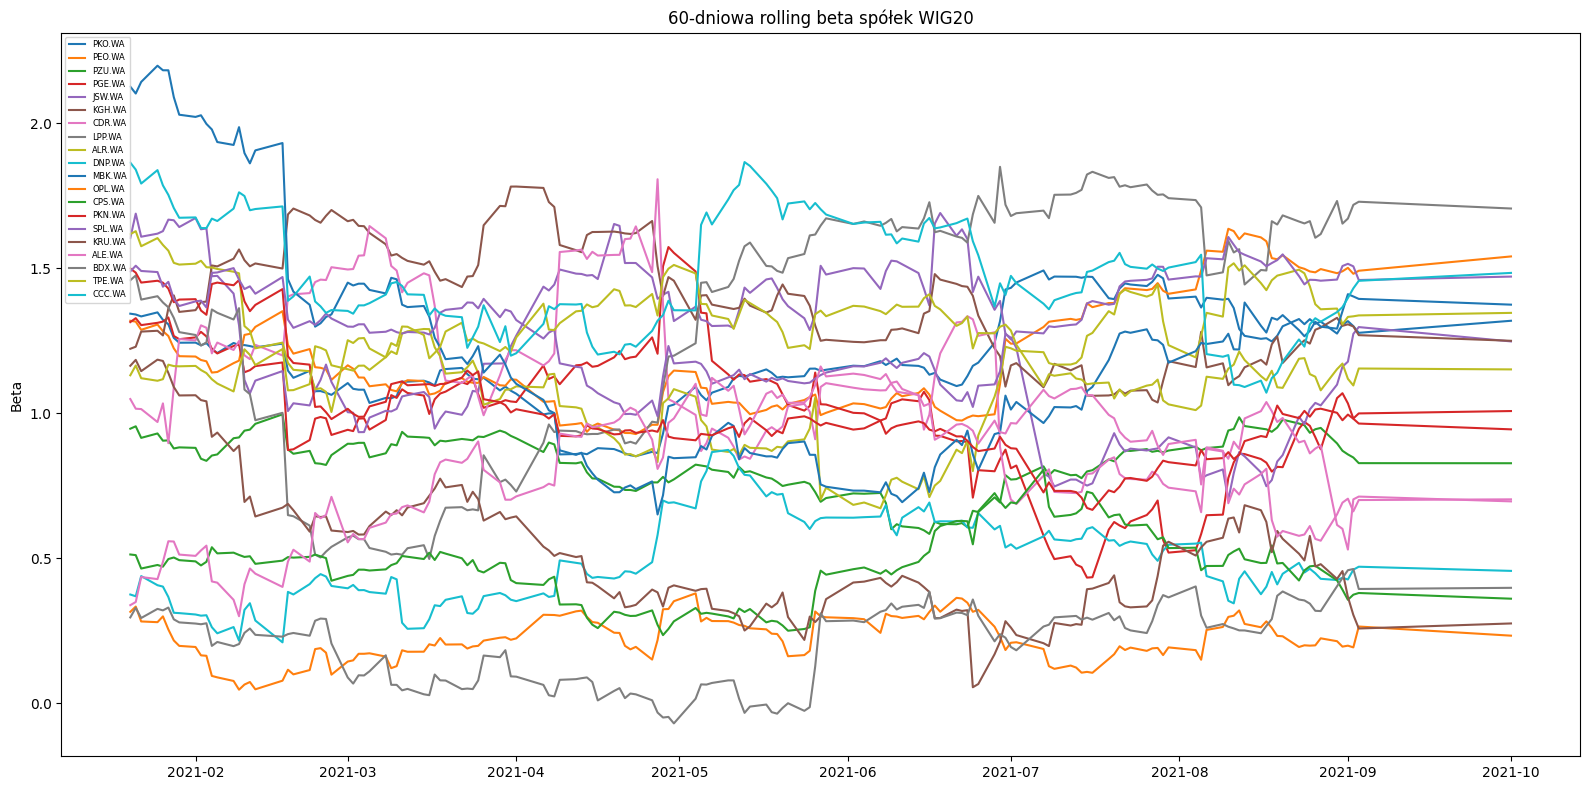

In [ ]:
plt.figure(figsize=(16, 8))
for ticker in beta_df.columns:
    plt.plot(beta_df.index, beta_df[ticker], label=ticker)

plt.title("60-dniowa rolling beta spółek WIG20")
plt.ylabel("Beta")
plt.legend(loc='upper left', fontsize=6)
plt.tight_layout()
plt.show()

In [81]:
summary = pd.DataFrame({
    'Średnia Beta': beta_df.mean(axis=0),
    'Odchylenie Standardowe Bety': beta_df.std(axis=0),
    'Ostatnia Beta': beta_df.iloc[-1]
})
print(summary)

        Średnia Beta  Odchylenie Standardowe Bety  Ostatnia Beta
PKO.WA      1.189378                     0.164462       1.319355
PEO.WA      1.196681                     0.194738       1.541210
PZU.WA      0.831141                     0.096644       0.828060
PGE.WA      0.996548                     0.234695       1.008009
JSW.WA      1.219545                     0.283348       1.248151
KGH.WA      1.385680                     0.195118       1.250256
CDR.WA      1.101722                     0.281665       0.696516
LPP.WA      1.302156                     0.434495       1.706492
ALR.WA      1.158143                     0.250321       1.346561
DNP.WA      0.492634                     0.146805       0.456815
MBK.WA      1.195306                     0.390057       1.374939
OPL.WA      0.221864                     0.073647       0.233419
CPS.WA      0.470754                     0.120068       0.360903
PKN.WA      1.004367                     0.186856       0.944910
SPL.WA      1.300061     

#Interpretacje Bety:
### Beta > 1: spółka bardziej zmienna niż indeks
### Beta < 1: spółka mniej zmienna niż indeks